In [2]:
cd '/Users/pavanmreddy/Downloads'

/Users/pavanmreddy/Downloads


In [3]:
! pwd

/Users/pavanmreddy/Downloads


In [135]:
# ! git clone https://github.com/joshuaaduarte/categorize_ethnicity.git

Cloning into 'categorize_ethnicity'...
remote: Enumerating objects: 194917, done.
remote: Total 194917 (delta 0), reused 0 (delta 0), pack-reused 194917
Receiving objects: 100% (194917/194917), 984.16 MiB | 16.34 MiB/s, done.
Resolving deltas: 100% (83/83), done.
Updating files: 100% (115405/115405), done.


In [4]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [6]:
# change the paths with respect to the local computer path for Josh
IMAGE_SIZE = [224,224]
train_path = "/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw"
test_path = "/Users/pavanmreddy/Downloads/categorize_ethnicity/val_raw"

In [7]:
folders = glob('/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/*')

In [8]:
folders

['/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Indian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Latino_Hispanic',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/East Asian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Middle Eastern',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/White',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Southeast Asian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Black']

In [9]:
len(folders)

7

In [10]:
IMG_SIZE = 224
CHANNELS = 3
NUM_CLASSES = 7
BATCH_SIZE = 32

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Activation
VGGFace = Sequential()

VGGFace.add(ZeroPadding2D(input_shape = (IMG_SIZE, IMG_SIZE, CHANNELS)))
VGGFace.add(Conv2D(64, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(64, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(128, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(128, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(256, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(256, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(256, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(Conv2D(4096, (7, 7), activation = 'relu'))
VGGFace.add(Dropout(0.5))


VGGFace.add(Conv2D(4096, (1, 1), activation = 'relu'))
VGGFace.add(Dropout(0.5))

VGGFace.add(Conv2D(2622, (1, 1)))
VGGFace.add(Flatten())
VGGFace.add(Activation('softmax'))

VGGFace.load_weights('/Users/pavanmreddy/Downloads/categorize_ethnicity/vgg_face_weights.h5')

VGGFace.pop()
VGGFace.pop()
VGGFace.pop()

model = Sequential()

model.add(VGGFace)
model.add(Conv2D(NUM_CLASSES, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

model.layers[0].trainable = False



Metal device set to: Apple M1 Max


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1, 1, 4096)        134260544 
                                                                 
 conv2d_16 (Conv2D)          (None, 1, 1, 7)           28679     
                                                                 
 flatten_1 (Flatten)         (None, 7)                 0         
                                                                 
 activation_1 (Activation)   (None, 7)                 0         
                                                                 
Total params: 134,289,223
Trainable params: 28,679
Non-trainable params: 134,260,544
_________________________________________________________________


In [25]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# opt = Adam
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

In [27]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range=2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 
                                                 class_mode = 'categorical')

Found 69734 images belonging to 7 classes.


In [30]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            
                                            class_mode = 'categorical')

Found 27660 images belonging to 7 classes.


In [31]:
early_stop = EarlyStopping(patience=3, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3, verbose=1, min_lr=0.0001)

In [170]:
# fit the model
# Run the cell. It will take some time to execute
BATCH_SIZE=32
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1,
  callbacks = [early_stop, reduce_lr]
)

Epoch 1/10
69/69 [==============================] - 24s 339ms/step - loss: 1.5021 - accuracy: 0.4914 - val_loss: 1.5340 - val_accuracy: 0.4844 - lr: 0.0100
Epoch 2/10
69/69 [==============================] - 23s 332ms/step - loss: 1.4844 - accuracy: 0.4982 - val_loss: 1.5220 - val_accuracy: 0.5022 - lr: 0.0100
Epoch 3/10
69/69 [==============================] - 23s 331ms/step - loss: 1.4906 - accuracy: 0.5005 - val_loss: 1.5240 - val_accuracy: 0.5022 - lr: 0.0100
Epoch 4/10
69/69 [==============================] - 23s 335ms/step - loss: 1.5010 - accuracy: 0.4828 - val_loss: 1.5158 - val_accuracy: 0.4866 - lr: 0.0100
Epoch 5/10
69/69 [==============================] - 23s 331ms/step - loss: 1.4933 - accuracy: 0.5045 - val_loss: 1.5353 - val_accuracy: 0.4576 - lr: 0.0100
Epoch 6/10
69/69 [==============================] - 23s 333ms/step - loss: 1.4831 - accuracy: 0.5077 - val_loss: 1.5324 - val_accuracy: 0.4754 - lr: 0.0100
Epoch 7/10
69/69 [==============================] - ETA: 0s - lo

In [79]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1,
  callbacks = [early_stop, reduce_lr]
)

Epoch 1/20
69/69 [==============================] - 23s 326ms/step - loss: 1.4488 - accuracy: 0.5050 - val_loss: 1.4678 - val_accuracy: 0.4978 - lr: 0.0010
Epoch 2/20
69/69 [==============================] - 23s 338ms/step - loss: 1.4194 - accuracy: 0.5240 - val_loss: 1.4468 - val_accuracy: 0.5212 - lr: 0.0010
Epoch 3/20
69/69 [==============================] - 23s 339ms/step - loss: 1.4087 - accuracy: 0.5240 - val_loss: 1.4320 - val_accuracy: 0.5201 - lr: 0.0010
Epoch 4/20
69/69 [==============================] - 23s 337ms/step - loss: 1.3909 - accuracy: 0.5303 - val_loss: 1.4298 - val_accuracy: 0.5190 - lr: 0.0010
Epoch 5/20
69/69 [==============================] - 23s 336ms/step - loss: 1.3745 - accuracy: 0.5231 - val_loss: 1.4056 - val_accuracy: 0.5201 - lr: 0.0010
Epoch 6/20
69/69 [==============================] - 24s 347ms/step - loss: 1.3811 - accuracy: 0.5208 - val_loss: 1.3857 - val_accuracy: 0.5379 - lr: 0.0010
Epoch 7/20
69/69 [==============================] - 23s 333ms/st

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1
)

Epoch 1/50
14/14 [==============================] - 7s 489ms/step - loss: 1.7005 - accuracy: 0.5045 - val_loss: 1.7098 - val_accuracy: 0.4531
Epoch 2/50
14/14 [==============================] - 8s 545ms/step - loss: 1.7113 - accuracy: 0.4888 - val_loss: 1.7583 - val_accuracy: 0.4219
Epoch 3/50
14/14 [==============================] - 8s 554ms/step - loss: 1.7015 - accuracy: 0.5000 - val_loss: 1.7184 - val_accuracy: 0.5156
Epoch 4/50
14/14 [==============================] - 7s 477ms/step - loss: 1.7033 - accuracy: 0.4799 - val_loss: 1.7324 - val_accuracy: 0.4844
Epoch 5/50
14/14 [==============================] - 9s 620ms/step - loss: 1.6630 - accuracy: 0.5134 - val_loss: 1.6830 - val_accuracy: 0.4922
Epoch 6/50
14/14 [==============================] - 7s 482ms/step - loss: 1.6769 - accuracy: 0.5179 - val_loss: 1.6560 - val_accuracy: 0.5625
Epoch 7/50
14/14 [==============================] - 11s 769ms/step - loss: 1.6521 - accuracy: 0.4911 - val_loss: 1.6821 - val_accuracy: 0.4609
Epoch

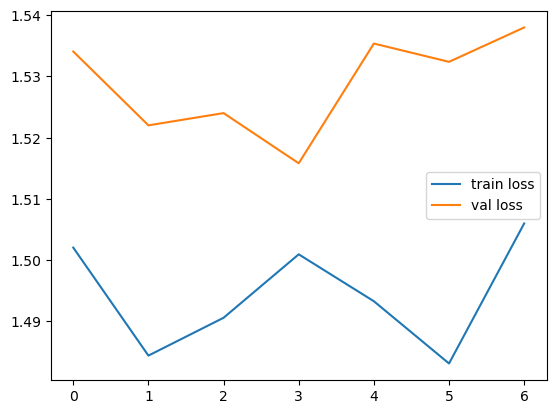

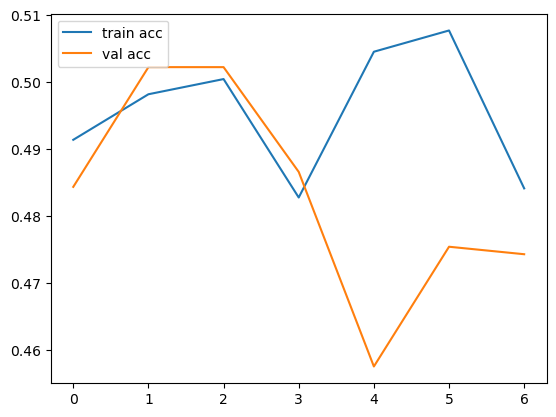

<Figure size 640x480 with 0 Axes>

In [171]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# change the paths with respect to the local computer path for Josh
! mkdir /content/gdrive/MyDrive/DataScience_Project

mkdir: cannot create directory ‘/content/gdrive/MyDrive/DataScience_Project’: File exists


In [16]:
cd '/Users/pavanmreddy/Downloads/results'

/Users/pavanmreddy/Downloads/results


In [17]:
pwd

'/Users/pavanmreddy/Downloads/results'

In [32]:
from tensorflow.keras.models import load_model
model.save('model_vggface20trial69x27.h5')

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model = load_model('/Users/pavanmreddy/Downloads/results/trial69x27/model_vggface20trial69x27.h5')

In [35]:
y_pred = model.predict(test_set)

2023-05-08 18:25:28.741725: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 35/865 [>.............................] - ETA: 2:50

KeyboardInterrupt: 

In [23]:
print(y_pred)

[[0.13004918 0.08449245 0.10208403 ... 0.11790824 0.06176343 0.3816967 ]
 [0.04743953 0.02024974 0.08232722 ... 0.17083685 0.023375   0.44224158]
 [0.14950672 0.01223475 0.27376574 ... 0.17159599 0.02925047 0.09730806]
 ...
 [0.06710463 0.03236808 0.06029139 ... 0.05994038 0.03925921 0.5780356 ]
 [0.04687207 0.4503075  0.0511281  ... 0.05930464 0.16586857 0.1459872 ]
 [0.03039261 0.21722159 0.04658601 ... 0.14193504 0.07939729 0.3723266 ]]


In [24]:
y_pred = np.argmax(y_pred, axis=1)

In [25]:
print(y_pred)

[6 6 2 ... 6 1 6]


1/1 [==============================] - 0s 198ms/step
[1]
East Asian


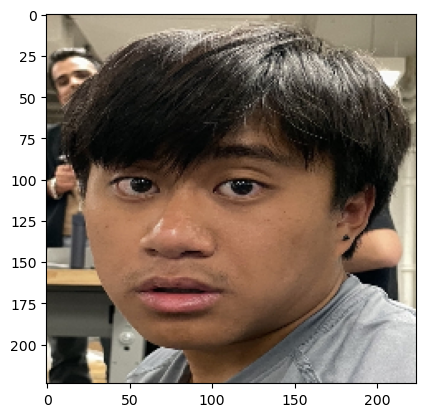

In [36]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_F665CD17AA96-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 19ms/step
[1]
East Asian


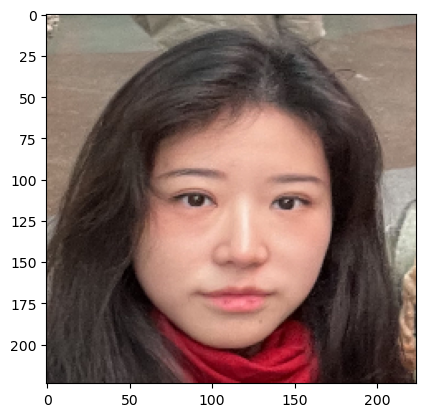

In [52]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_23500825C529-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 20ms/step
[2]
Indian


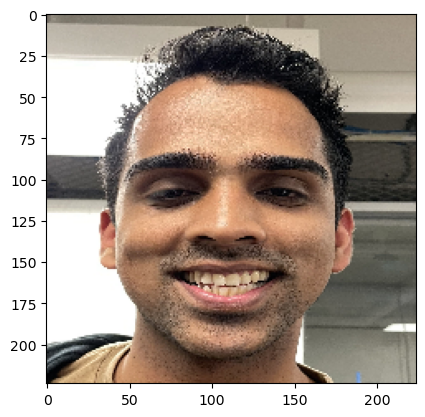

In [54]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_8326.jpg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 17ms/step
[1]
East Asian


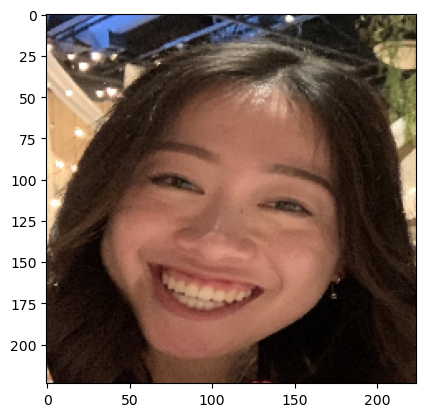

In [55]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_E28EE0C1CC7C-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 17ms/step
[2]
Indian


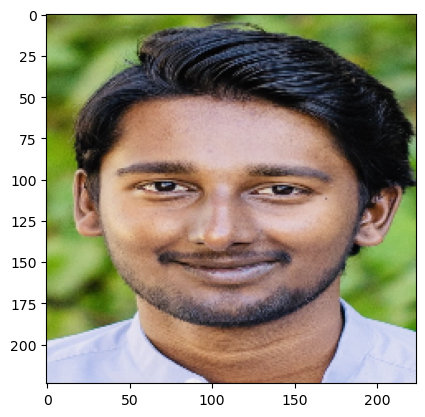

In [56]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_23833E363BBE-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 18ms/step
[2]
Indian


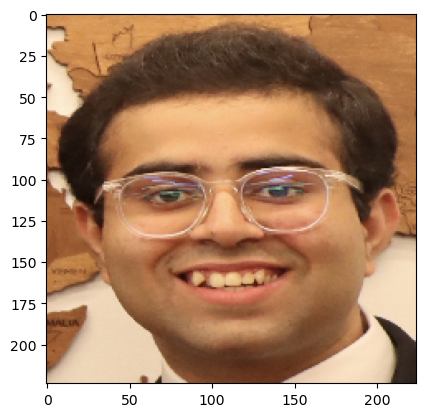

In [57]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_F9E270A4B061-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 18ms/step
[6]
White


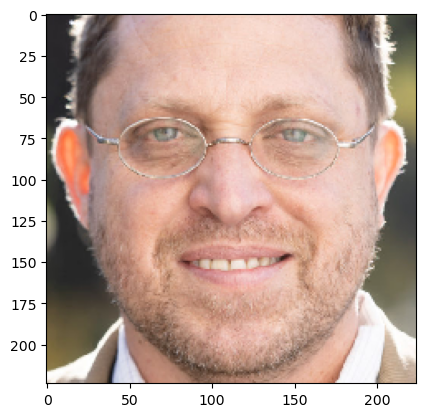

In [61]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/Screenshot 2023-05-05 at 12.23.39 AM.png'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 17ms/step
[6]
White


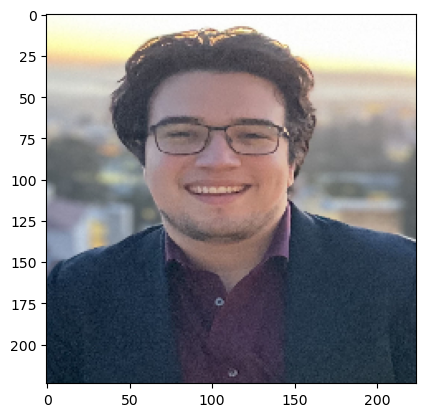

In [65]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_4796D86B5978-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 17ms/step
[6]
White


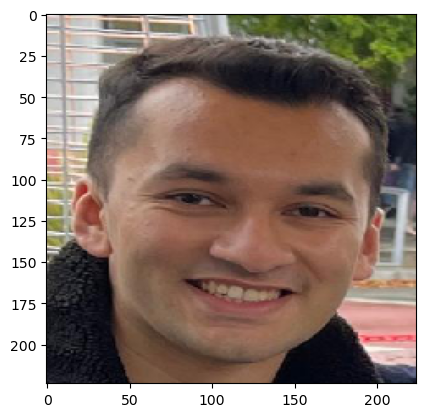

In [95]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/PHOTO-2023-05-05-14-55-15.jpg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 26ms/step
[2]
Indian


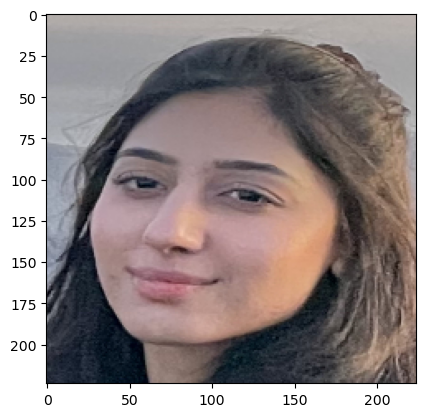

In [85]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_2D0D72C5C328-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 22ms/step
[6]
White


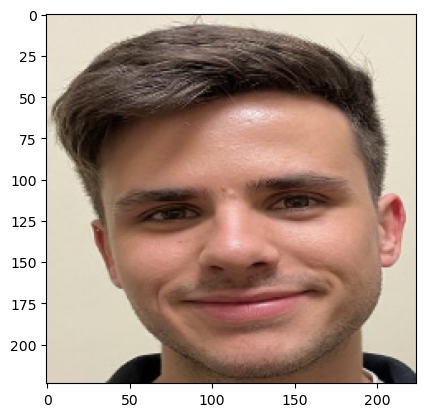

In [88]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_80820E4518FC-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 20ms/step
[6]
White


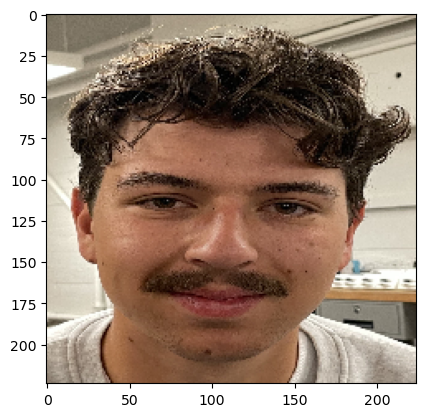

In [89]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_50BAB927F5D5-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 19ms/step
[3]
Latino_Hispanic


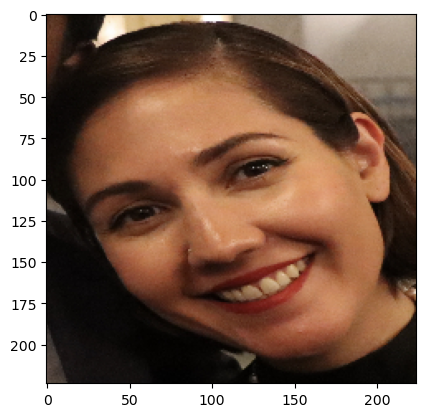

In [90]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_CF419459A271-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 17ms/step
[4]
Middle Eastern


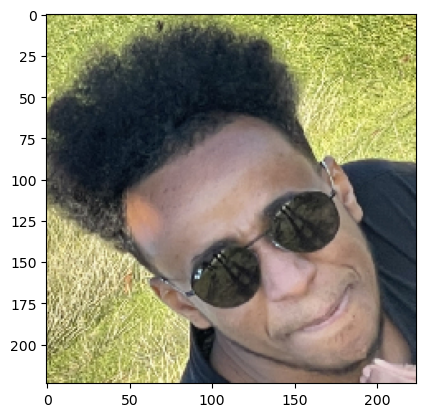

In [91]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_6829F37CA461-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 19ms/step
[3]
Latino_Hispanic


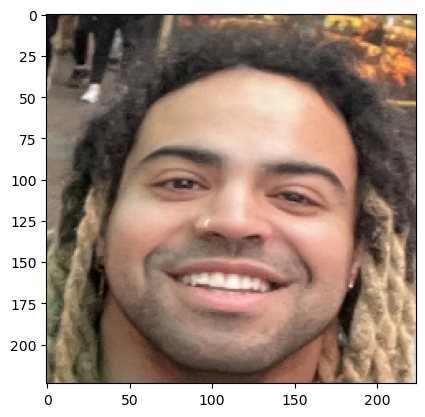

In [92]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_4B7D107F847C-1 2.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)

1/1 [==============================] - 0s 18ms/step
[6]
White


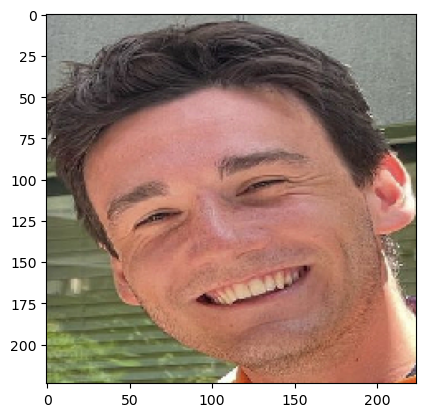

In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# Converts a PIL Image to 3D Numy Array

img_path = '/Users/pavanmreddy/Downloads/IMG_FA74E1BD538A-1.jpeg'
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
# display(img)
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
class_labels = ['Black','East Asian', 'Indian', 'Latino_Hispanic', 'Middle Eastern', 'Southeast Asian', 'White']
y_pred = np.argmax(y, axis=1)
print((y_pred))
print(class_labels[y_pred[0]])
plt.imshow(img)